### GUI Neutral Widgets2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

%matplotlib notebook

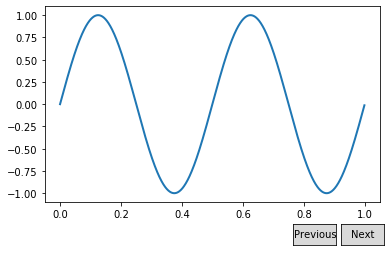

In [2]:
freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()    
plt.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = plt.plot(t,s,lw=2)


class Index(object):
    ind = 0
    
    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()
        
callback = Index()
axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

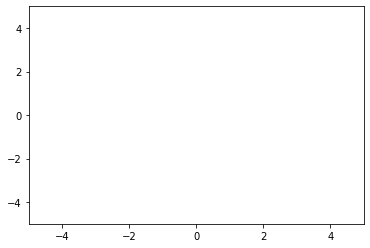

In [3]:
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']

metadata = dict(title='Movie Test', artist='Matplotlib', comment='Movie Support!')

writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure()
l, plt.plot([],[],'k-o')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

x0, y0 = 0,0

with writer.saving(fig, 'writer_test.mp4', 100):
    for i in range(100):
        x0 += 0.1 * np.random.randn()
        y0 += 0.1 * np.random.randn()
        l.set_data(x0,y0)
        writer.grab_frame()